In [ ]:
import pandas as pd
data = pd.read_csv('rawdatahomeprice.csv')data['area'].replace('hi',5050,inplace=True)
data['area'].replace('Hassan',4550,inplace=True)
data['price'].replace('hello',305540,inplace=True)
data['price'].replace('Psycho',484550,inplace=True)
mode_value = data['area'].mode()[0]
data["area"].fillna(mode_value, inplace = True)
m = data['price'].mode()[0]
data["price"].fillna(m, inplace = True)
data

In [2]:
import pandas as pd
data=pd.read_csv('DataSet.csv')
data

,Developer,Age,Married,Salary
0,Karachi,42.0,No,78000.0
1,Lahore,32.0,Yes,48000.0
2,Karachi,36.0,No,60000.0
3,Multan,41.0,No,68000.0
4,Lahore,42.0,Yes,NaN
5,Multan,43.0,Yes,59000.0
6,Karachi,NaN,No,59000.0
7,Lahore,44.0,Yes,79000.0
8,Multan,52.0,No,99000.0
9,Lahore,32.0,Yes,69000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Developer  10 non-null     object 
 1   Age        9 non-null      float64
 2   Married    10 non-null     object 
 3   Salary     9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [4]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,40.444444,68777.777778
std,6.326751,15014.807506
min,32.000000,48000.000000
25%,36.000000,59000.000000
50%,42.000000,68000.000000
75%,43.000000,78000.000000
max,52.000000,99000.000000


In [5]:
m = data['Salary'].median()
data['Salary'].fillna(m, inplace = True)
data

,Developer,Age,Married,Salary
0,Karachi,42.0,No,78000.0
1,Lahore,32.0,Yes,48000.0
2,Karachi,36.0,No,60000.0
3,Multan,41.0,No,68000.0
4,Lahore,42.0,Yes,68000.0
5,Multan,43.0,Yes,59000.0
6,Karachi,NaN,No,59000.0
7,Lahore,44.0,Yes,79000.0
8,Multan,52.0,No,99000.0
9,Lahore,32.0,Yes,69000.0


In [6]:
data["Salary"]=data["Salary"].astype(int)
data

,Developer,Age,Married,Salary
0,Karachi,42.0,No,78000
1,Lahore,32.0,Yes,48000
2,Karachi,36.0,No,60000
3,Multan,41.0,No,68000
4,Lahore,42.0,Yes,68000
5,Multan,43.0,Yes,59000
6,Karachi,NaN,No,59000
7,Lahore,44.0,Yes,79000
8,Multan,52.0,No,99000
9,Lahore,32.0,Yes,69000


In [10]:
m = data['Age'].median()
data['Age'].fillna(m, inplace = True)
data

,Developer,Age,Married,Salary
0,Karachi,42.0,No,78000
1,Lahore,32.0,Yes,48000
2,Karachi,36.0,No,60000
3,Multan,41.0,No,68000
4,Lahore,42.0,Yes,68000
5,Multan,43.0,Yes,59000
6,Karachi,42.0,No,59000
7,Lahore,44.0,Yes,79000
8,Multan,52.0,No,99000
9,Lahore,32.0,Yes,69000


In [11]:
data["Age"]=data["Age"].astype(int)
data

,Developer,Age,Married,Salary
0,Karachi,42,No,78000
1,Lahore,32,Yes,48000
2,Karachi,36,No,60000
3,Multan,41,No,68000
4,Lahore,42,Yes,68000
5,Multan,43,Yes,59000
6,Karachi,42,No,59000
7,Lahore,44,Yes,79000
8,Multan,52,No,99000
9,Lahore,32,Yes,69000


In [12]:
m = data['Age'].median()
data['Age'].fillna(m, inplace = True)
data

,Developer,Age,Married,Salary
0,Karachi,42,No,78000
1,Lahore,32,Yes,48000
2,Karachi,36,No,60000
3,Multan,41,No,68000
4,Lahore,42,Yes,68000
5,Multan,43,Yes,59000
6,Karachi,42,No,59000
7,Lahore,44,Yes,79000
8,Multan,52,No,99000
9,Lahore,32,Yes,69000


In [13]:
data.isnull().sum()

Developer    0
Age          0
Married      0
Salary       0
dtype: int64

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('DataSet.csv')
data.info()
data.describe()
label_encoder = LabelEncoder()
data['Developer'] = label_encoder.fit_transform(data['Developer'])
data['Married'] = label_encoder.fit_transform(data['Married'])
# Impute missing values
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Salary'] = imputer.fit_transform(data[['Salary']])
data['Age'] = data['Age'].astype(int)
data['Salary'] = data['Salary'].astype(int)
data.drop_duplicates(inplace=True)
X = data[['Developer', 'Age', 'Married']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 score:', r2)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Developer  10 non-null     object 
 1   Age        9 non-null      float64
 2   Married    10 non-null     object 
 3   Salary     9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
Mean Squared Error: 545020760.9426081
R^2 score: 0.1618288951286303
Coefficients: [-2626.93939394   648.90909091  4340.        ]
Intercept: 41769.33333333337


In [17]:
mse

545020760.9426081

In [18]:
r2

0.1618288951286303

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Developer  10 non-null     int32
 1   Age        10 non-null     int32
 2   Married    10 non-null     int32
 3   Salary     10 non-null     int32
dtypes: int32(4)
memory usage: 292.0 bytes


In [21]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Developer  10 non-null     object 
 1   Age        9 non-null      float64
 2   Married    10 non-null     object 
 3   Salary     9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
Mean Squared Error: 545020760.9426081
R^2 score: 0.1618288951286303
Coefficients: [-2626.93939394   648.90909091  4340.        ]
Intercept: 41769.33333333337


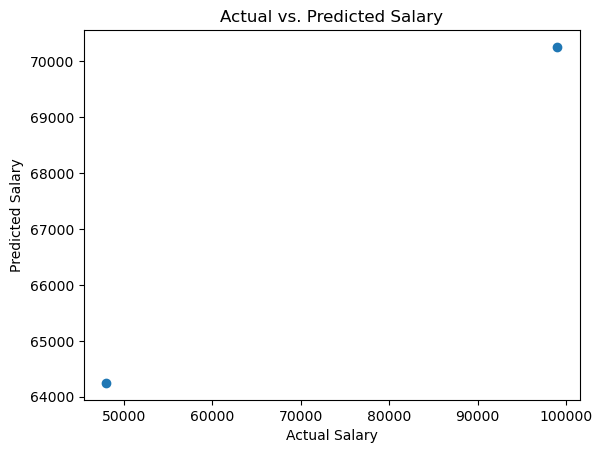

In [3]:
#Multiple linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('DataSet.csv')
data.info()
data.describe()
label_encoder = LabelEncoder()
data['Developer'] = label_encoder.fit_transform(data['Developer'])
data['Married'] = label_encoder.fit_transform(data['Married'])
# Impute missing values
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Salary'] = imputer.fit_transform(data[['Salary']])
data['Age'] = data['Age'].astype(int)
data['Salary'] = data['Salary'].astype(int)
data.drop_duplicates(inplace=True)
X = data[['Developer', 'Age', 'Married']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 score:', r2)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

In [4]:
mse

545020760.9426081

In [2]:
import pandas as pd
df=pd.read_csv('M_Regression.csv')
df

,indoor,outdoor,domestic,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   indoor    50 non-null     float64
 1   outdoor   50 non-null     float64
 2   domestic  50 non-null     float64
 3   Profit    50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [4]:
df.describe()

,indoor,outdoor,domestic,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [6]:
df.isnull().sum()

indoor      0
outdoor     0
domestic    0
Profit      0
dtype: int64

In [14]:
df["domestic"]=df["domestic"].astype(int)
df

,indoor,outdoor,domestic,Profit
0,165349.20,136897.80,471784,192261.83
1,162597.70,151377.59,443898,191792.06
2,153441.51,101145.55,407934,191050.39
3,144372.41,118671.85,383199,182901.99
4,142107.34,91391.77,366168,166187.94
5,131876.90,99814.71,362861,156991.12
6,134615.46,147198.87,127716,156122.51
7,130298.13,145530.06,323876,155752.60
8,120542.52,148718.95,311613,152211.77
9,123334.88,108679.17,304981,149759.96


In [11]:
m = df['domestic'].median()
df['domestic'].fillna(m, inplace = True)
df

,indoor,outdoor,domestic,Profit
0,165349.20,136897.80,471784,192261.83
1,162597.70,151377.59,443898,191792.06
2,153441.51,101145.55,407934,191050.39
3,144372.41,118671.85,383199,182901.99
4,142107.34,91391.77,366168,166187.94
5,131876.90,99814.71,362861,156991.12
6,134615.46,147198.87,127716,156122.51
7,130298.13,145530.06,323876,155752.60
8,120542.52,148718.95,311613,152211.77
9,123334.88,108679.17,304981,149759.96


In [15]:
df["indoor"]=df["indoor"].astype(int)
df

,indoor,outdoor,domestic,Profit
0,165349,136897.80,471784,192261.83
1,162597,151377.59,443898,191792.06
2,153441,101145.55,407934,191050.39
3,144372,118671.85,383199,182901.99
4,142107,91391.77,366168,166187.94
5,131876,99814.71,362861,156991.12
6,134615,147198.87,127716,156122.51
7,130298,145530.06,323876,155752.60
8,120542,148718.95,311613,152211.77
9,123334,108679.17,304981,149759.96


In [16]:
m = df['indoor'].median()
df['indoor'].fillna(m, inplace = True)
df

,indoor,outdoor,domestic,Profit
0,165349,136897.80,471784,192261.83
1,162597,151377.59,443898,191792.06
2,153441,101145.55,407934,191050.39
3,144372,118671.85,383199,182901.99
4,142107,91391.77,366168,166187.94
5,131876,99814.71,362861,156991.12
6,134615,147198.87,127716,156122.51
7,130298,145530.06,323876,155752.60
8,120542,148718.95,311613,152211.77
9,123334,108679.17,304981,149759.96


In [17]:
df["outdoor"]=df["outdoor"].astype(int)
df

,indoor,outdoor,domestic,Profit
0,165349,136897,471784,192261.83
1,162597,151377,443898,191792.06
2,153441,101145,407934,191050.39
3,144372,118671,383199,182901.99
4,142107,91391,366168,166187.94
5,131876,99814,362861,156991.12
6,134615,147198,127716,156122.51
7,130298,145530,323876,155752.60
8,120542,148718,311613,152211.77
9,123334,108679,304981,149759.96


In [18]:
m = df['outdoor'].median()
df['outdoor'].fillna(m, inplace = True)
df

,indoor,outdoor,domestic,Profit
0,165349,136897,471784,192261.83
1,162597,151377,443898,191792.06
2,153441,101145,407934,191050.39
3,144372,118671,383199,182901.99
4,142107,91391,366168,166187.94
5,131876,99814,362861,156991.12
6,134615,147198,127716,156122.51
7,130298,145530,323876,155752.60
8,120542,148718,311613,152211.77
9,123334,108679,304981,149759.96


In [19]:
df["Profit"]=df["Profit"].astype(int)
df

,indoor,outdoor,domestic,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187
5,131876,99814,362861,156991
6,134615,147198,127716,156122
7,130298,145530,323876,155752
8,120542,148718,311613,152211
9,123334,108679,304981,149759


In [20]:
m = df['Profit'].median()
df['Profit'].fillna(m, inplace = True)
df

,indoor,outdoor,domestic,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187
5,131876,99814,362861,156991
6,134615,147198,127716,156122
7,130298,145530,323876,155752
8,120542,148718,311613,152211
9,123334,108679,304981,149759


,indoor,outdoor,domestic,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187
5,131876,99814,362861,156991
6,134615,147198,127716,156122
7,130298,145530,323876,155752
8,120542,148718,311613,152211
9,123334,108679,304981,149759


In [1]:
import pandas as pd
df=pd.read_csv('Salary_Dataset.csv')
df

,Experences,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experences  30 non-null     float64
 1   Salary      30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [4]:
df.describe()

,Experences,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [9]:
df.isnull().sum()

Experences    0
Salary        0
dtype: int64

In [10]:
df["Experences"]=df["Experences"].astype(int)
df

,Experences,Salary
0,1,39343
1,1,46205
2,1,37731
3,2,43525
4,2,39891
5,2,56642
6,3,60150
7,3,54445
8,3,64445
9,3,57189


In [4]:
#logistic Regression Model:
'''
import numpy as np
import matplotlib.pylot as plt
import pandas as pd
import seaborn as sns
#import the data set Desktop
dataset=pd.read_csv('LR.csv')
X=dataset.iloc[:,[0,1]].values
y=dataset.iloc[:,2].values
#Training and Testing Data(divide the data into two part)
from sklearn.model_selection import train_test_split(X,y,test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScalar()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression(random_state=0)
y_pred=classifer.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score)
sns.set(font_scale=1.4) #Adjust font size
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues',cbar=False)
plt.xlabel('Peredict lables')
plt.ylabel('True lables')
plt.title('confusion Matrix')
plt.show()
'''




"\nimport numpy as np\nimport matplotlib.pylot as plt\nimport pandas as pd\nimport seaborn as sns\n#import the data set Desktop\ndataset=pd.read_csv('LR.csv')\nX=dataset.iloc[:,[0,1]].values\ny=dataset.iloc[:,2].values\n#Training and Testing Data(divide the data into two part)\nfrom sklearn.model_selection import train_test_split(X,y,test_size=0.25, random_state=0)\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScalar()\nX_train=sc.fit_transform(X_train)\nX_test=sc.transform(X_test)\nfrom sklearn.linear_model import LogisticRegression\nclassifer=LogisticRegression(random_state=0)\ny_pred=classifer.predict(X_test)\nfrom sklearn.metrics import confusion_matrix\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nfrom sklearn.metrics import accuracy_score\nprint(accuracy_score)\nsns.set(font_scale=1.4) #Adjust font size\nsns.heatmap(cm, annot=True,fmt='g',cmap='Blues',cbar=False)\nplt.xlabel('Peredict lables')\nplt.ylabel('True lables')\nplt.title('confusion Matrix')\nplt.show()

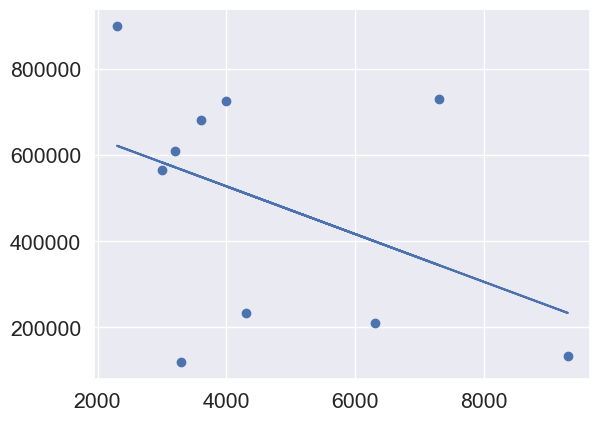

In [6]:
#Linear regression model
"""
Created on Thu Apr 18 12:20:46 2024

@author: abc
"""
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
data=pd.read_csv('homeprices1.csv')
X=data[['area']]
y=data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mol=LinearRegression()
mol.fit(X_train, y_train)
y_pred=mol.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
plt.scatter(X_train,y_train)
plt.plot(X_train,mol.predict(X_train))


[[65  3]
 [ 8 24]]
Accuracy: 0.89


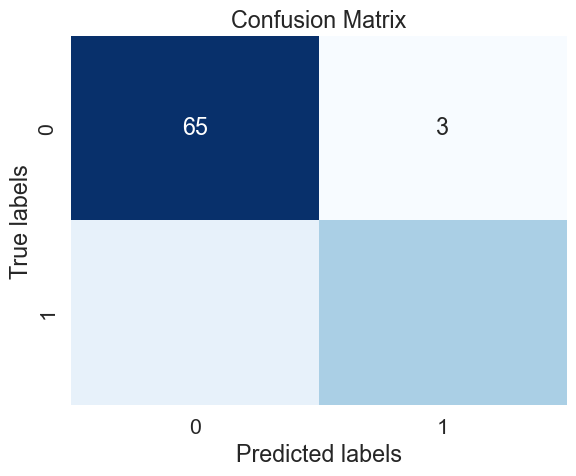

In [5]:
#logistic Regression Model:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the dataset
dataset = pd.read_csv('LR.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

# Training and Testing Data (divide the data into two parts)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Import Logistic Regression and create the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualizing the Confusion Matrix
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
